In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scanpy as sc

from sciso.plot import *

Set plot style

In [2]:
set_nature_style()

# QC of natural isotope abundance correction and single-cell analysis

## Set paths

In [3]:
# Input
data_dir = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220411_AB_DKFZACLYac") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "aclykd_adata_concat.h5ad"
adata_am_path =anndata_dir / "aclykd_adata_am_concat.h5ad"

# Output
plots_path = data_dir / "qc_plots"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

## Load anndata

In [4]:
adata = sc.read_h5ad(adata_path)
adata_am = sc.read_h5ad(adata_am_path)

## Filtering  

- NaNs in count matrix - in some cases one of the fatty acids was not detected, so we have to drop such cells.
- 'C12H24O2-H' was not detected much resulting in a lot of NaNs, so let's drop it.

In [5]:
print_statistics(adata)

Number of cells per dataset
S1W1 191  cells
S1W2 293  cells
S1W3 315  cells
S1W4 340  cells
S1W5 212  cells
S1W6 238  cells
S1W7 464  cells
S1W8 376  cells
S2W1 309  cells
S2W2 262  cells
S2W3 342  cells
S2W4 207  cells
S2W5 416  cells
S2W6 363  cells
S2W7 414  cells
S2W8 189  cells
S3W1 299  cells
S3W2 362  cells
S3W3 281  cells
S3W4 422  cells
S3W5 251  cells
S3W6 373  cells
S3W7 419  cells
S3W8 358  cells
Number of cells per condition
ACLYkd Ol.2 + Wildtype 1716  cells
ACLYkd Ol.2 938  cells
Wildtype 1892  cells
ACLY Ol.1 + Wildtype 1853  cells
ACLY Ol.1 1297  cells
Pivot table with condition and labeling state
growthConditions   Labeled                                   \
condition        ACLY Ol.1 ACLY Ol.1 + Wildtype ACLYkd Ol.2   
batch                 1297                 1853         938   

growthConditions                                 Unlabeled  \
condition        ACLYkd Ol.2 + Wildtype Wildtype ACLY Ol.1   
batch                              1716      969         0   

g

In [6]:
skip_ions = ["C12H24O2-H"]
adata_filtered = adata[:, ~adata.var.unlabeled_annotation_id.isin(skip_ions)]
adata_am_filtered = adata_am[:, ~adata_am.var.unlabeled_annotation_id.isin(skip_ions)]

In [7]:
rows_without_nan = ~np.isnan(adata_filtered.layers["corr_norm"]).any(axis=1)
adata_filtered = adata_filtered[rows_without_nan, :]

In [8]:
print_statistics(adata_filtered)

Number of cells per dataset
S1W1 191  cells
S1W2 292  cells
S1W3 315  cells
S1W4 168  cells
S1W5 212  cells
S1W6 237  cells
S1W7 464  cells
S1W8 376  cells
S2W1 308  cells
S2W2 262  cells
S2W3 342  cells
S2W4 207  cells
S2W5 416  cells
S2W6 363  cells
S2W7 414  cells
S2W8 188  cells
S3W1 297  cells
S3W2 361  cells
S3W3 257  cells
S3W4 201  cells
S3W5 251  cells
S3W6 269  cells
S3W7 396  cells
S3W8 326  cells
Number of cells per condition
ACLYkd Ol.2 + Wildtype 1711  cells
ACLYkd Ol.2 914  cells
Wildtype 1466  cells
ACLY Ol.1 + Wildtype 1748  cells
ACLY Ol.1 1274  cells
Pivot table with condition and labeling state
growthConditions   Labeled                                   \
condition        ACLY Ol.1 ACLY Ol.1 + Wildtype ACLYkd Ol.2   
batch                 1274                 1748         914   

growthConditions                                 Unlabeled  \
condition        ACLYkd Ol.2 + Wildtype Wildtype ACLY Ol.1   
batch                              1711      576         0   

g

## Compare fatty acid detection over slides and wells

QC to check reproducibility across slides.

In [9]:
adata_am_intra = adata_am_filtered[adata_am_filtered.obs.am_sampling_area > 0, :]

In [10]:
print_statistics(adata_am_intra)

Number of cells per dataset
S1W1 2427  cells
S1W2 2924  cells
S1W3 3471  cells
S1W4 3688  cells
S1W5 2275  cells
S1W6 2468  cells
S1W7 4391  cells
S1W8 3784  cells
S2W1 3147  cells
S2W2 2998  cells
S2W3 2987  cells
S2W4 2546  cells
S2W5 4376  cells
S2W6 3845  cells
S2W7 3911  cells
S2W8 2147  cells
S3W1 3461  cells
S3W2 3748  cells
S3W3 3192  cells
S3W4 4381  cells
S3W5 2626  cells
S3W6 3341  cells
S3W7 4039  cells
S3W8 3721  cells
Number of cells per condition
ACLYkd Ol.2 + Wildtype 18705  cells
ACLYkd Ol.2 9650  cells
Wildtype 20267  cells
ACLY Ol.1 + Wildtype 18931  cells
ACLY Ol.1 12341  cells
Pivot table with condition and labeling state
growthConditions   Labeled                                   \
condition        ACLY Ol.1 ACLY Ol.1 + Wildtype ACLYkd Ol.2   
batch                12341                18931        9650   

growthConditions                                 Unlabeled  \
condition        ACLYkd Ol.2 + Wildtype Wildtype ACLY Ol.1   
batch                             1

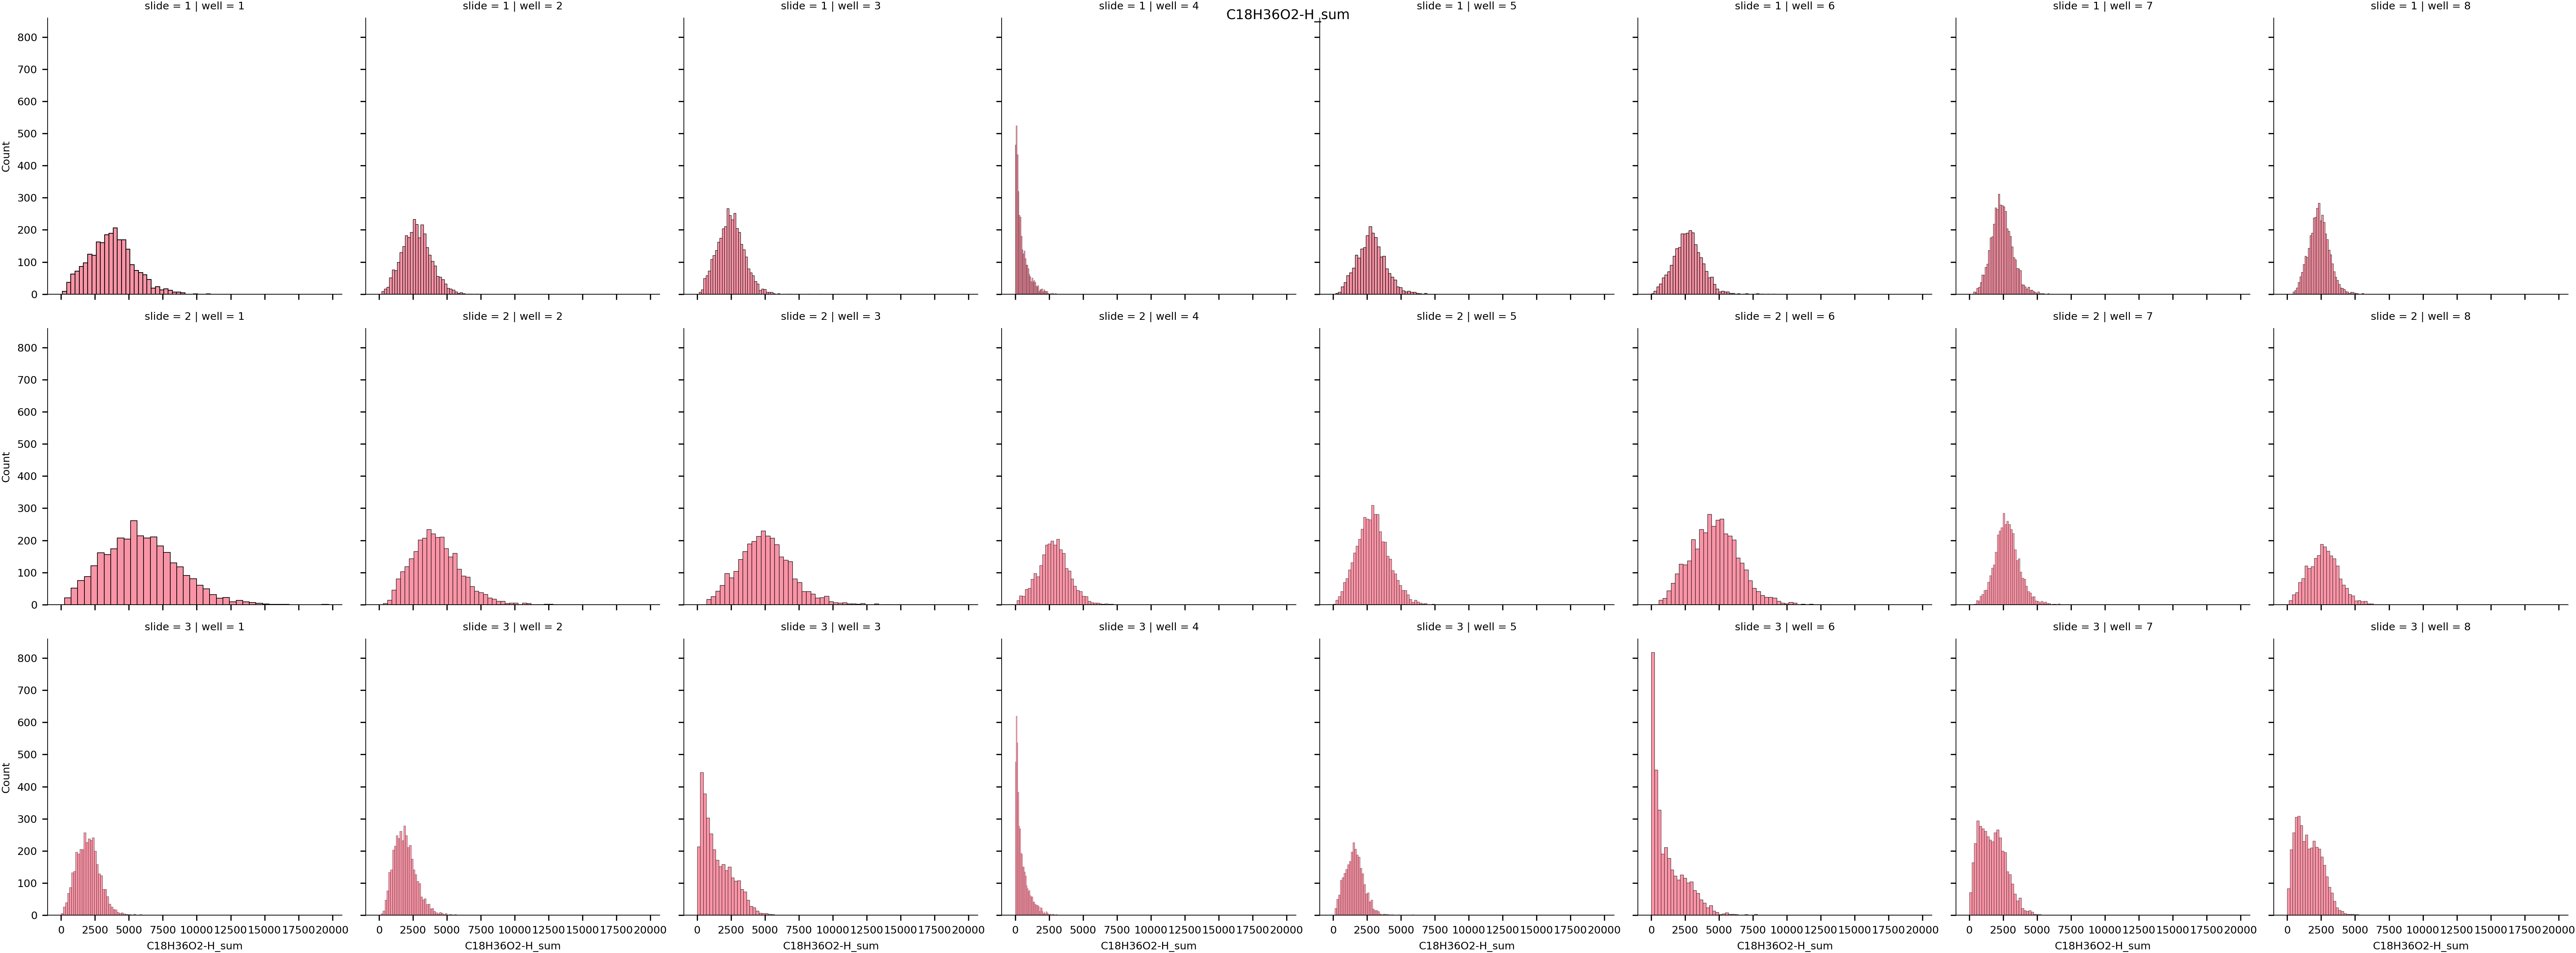

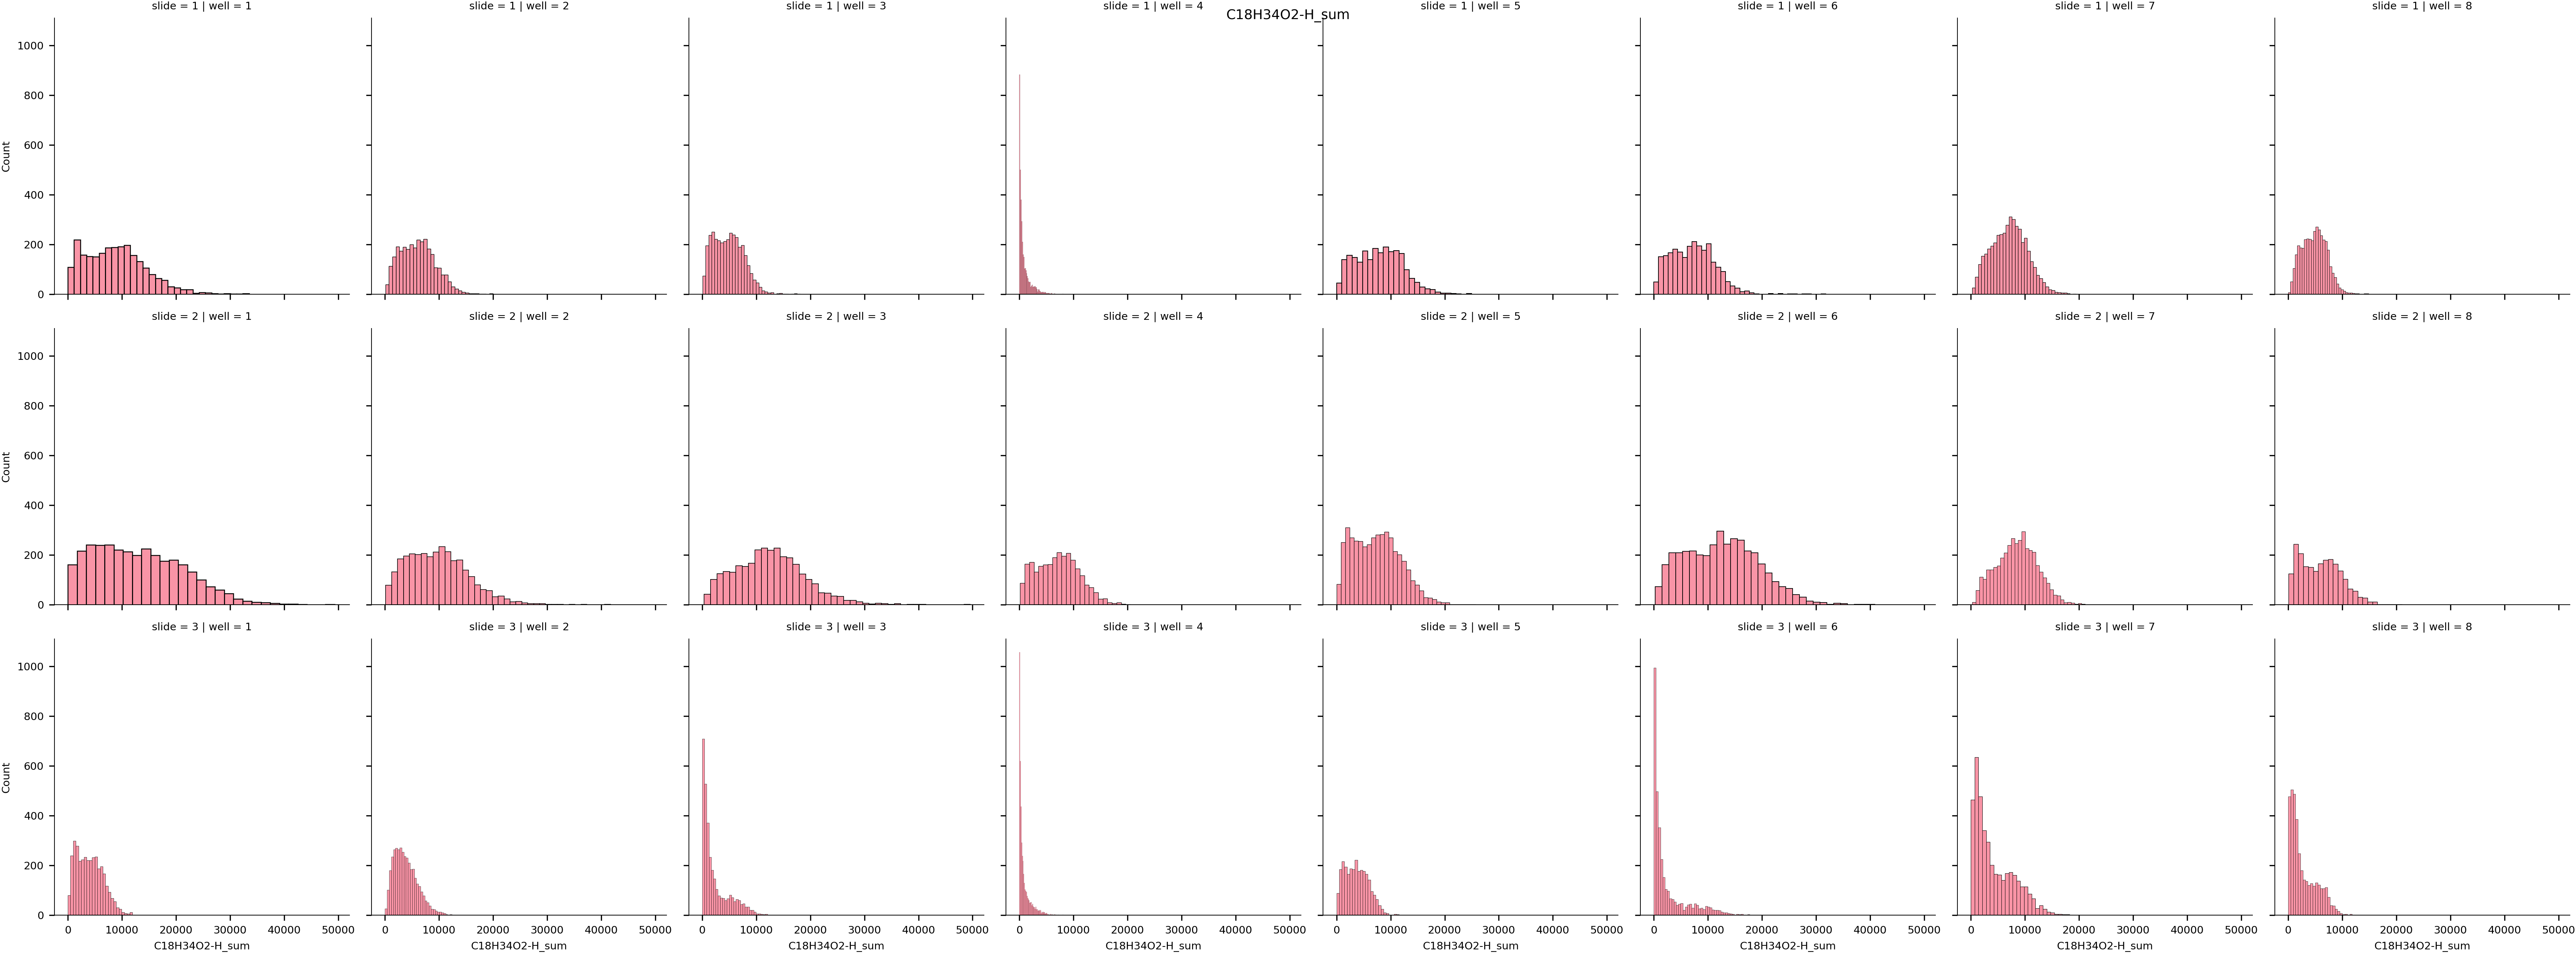

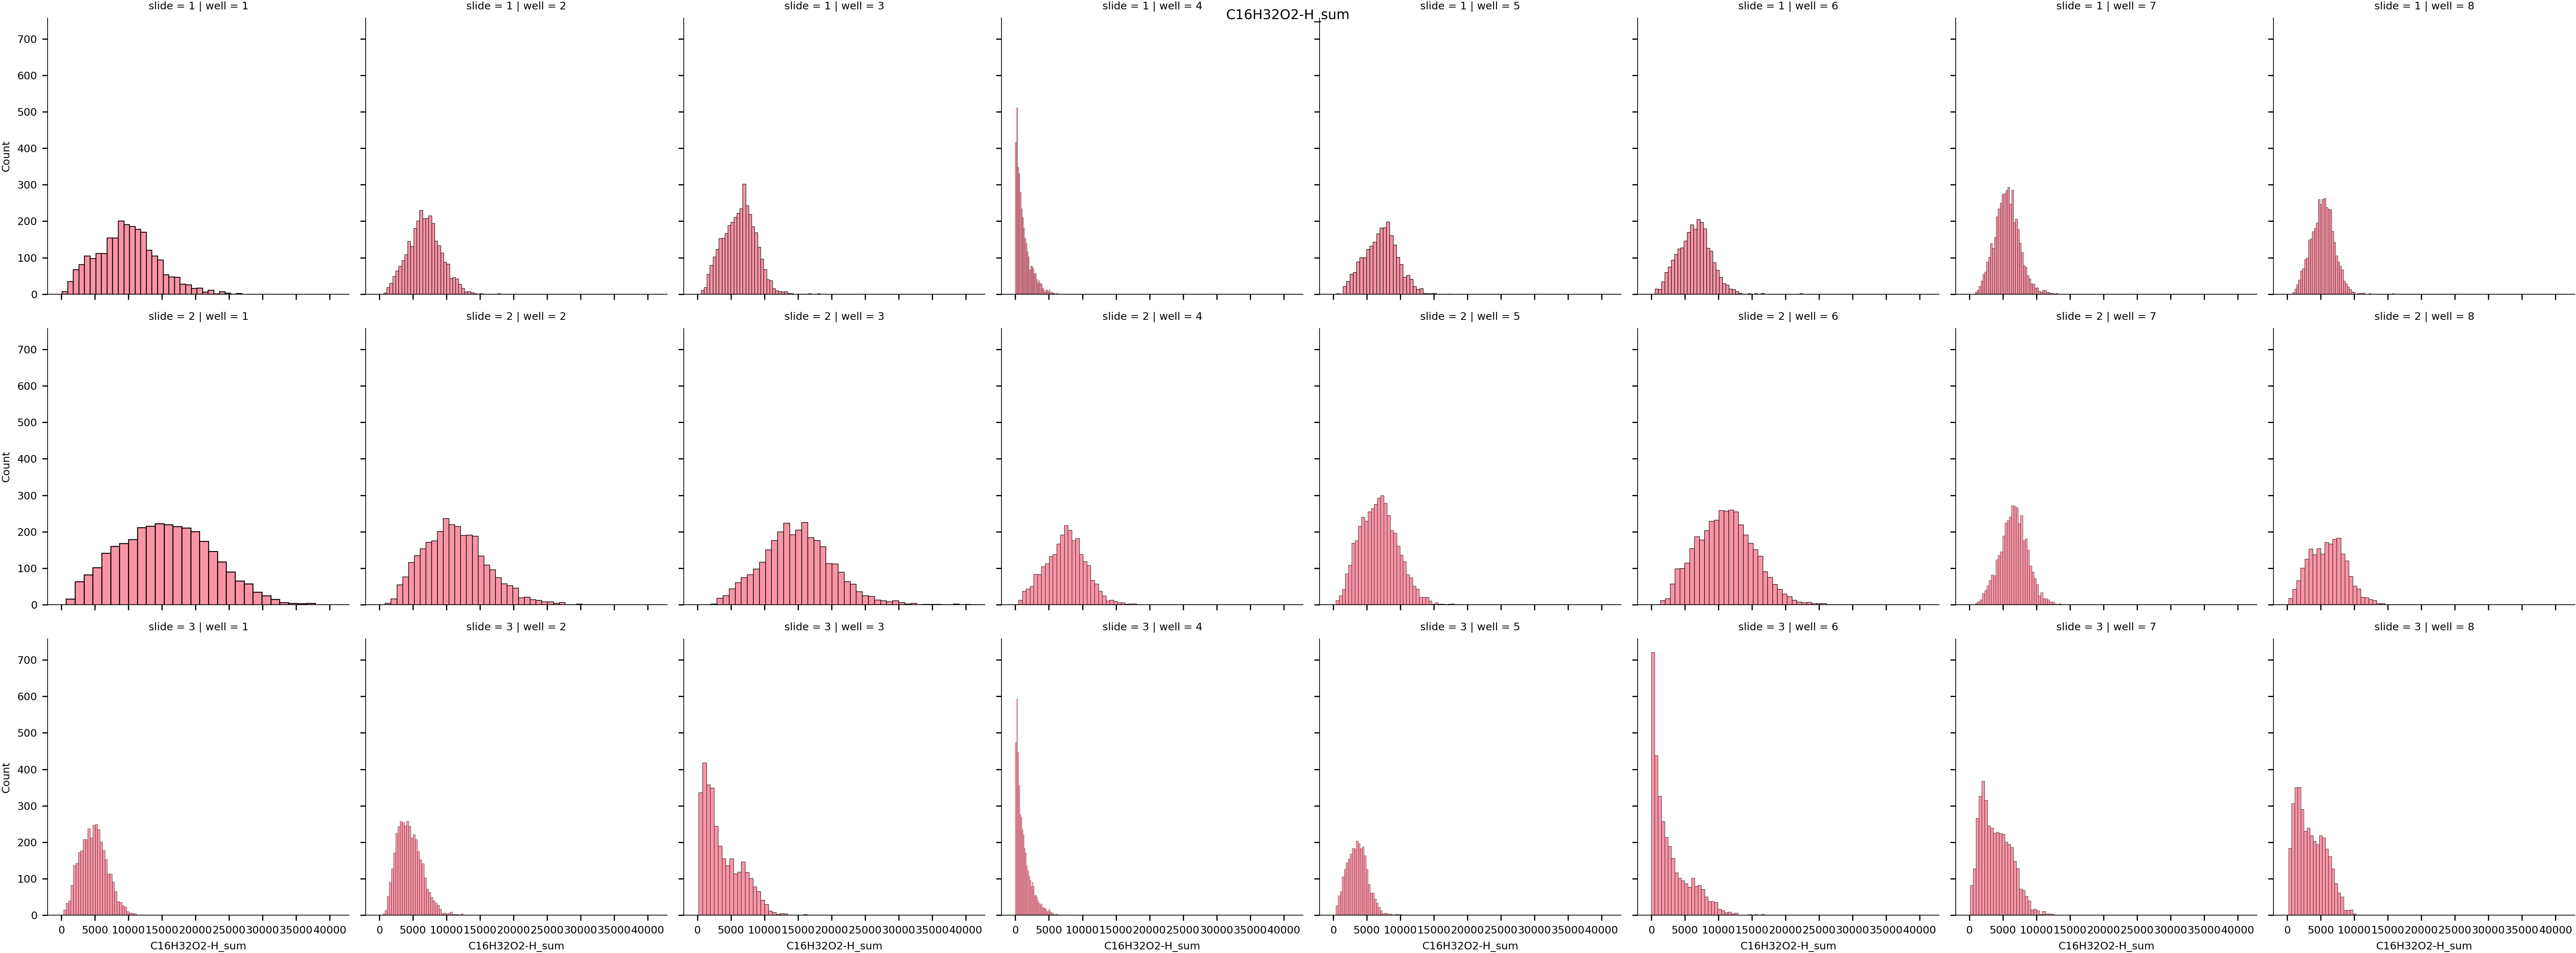

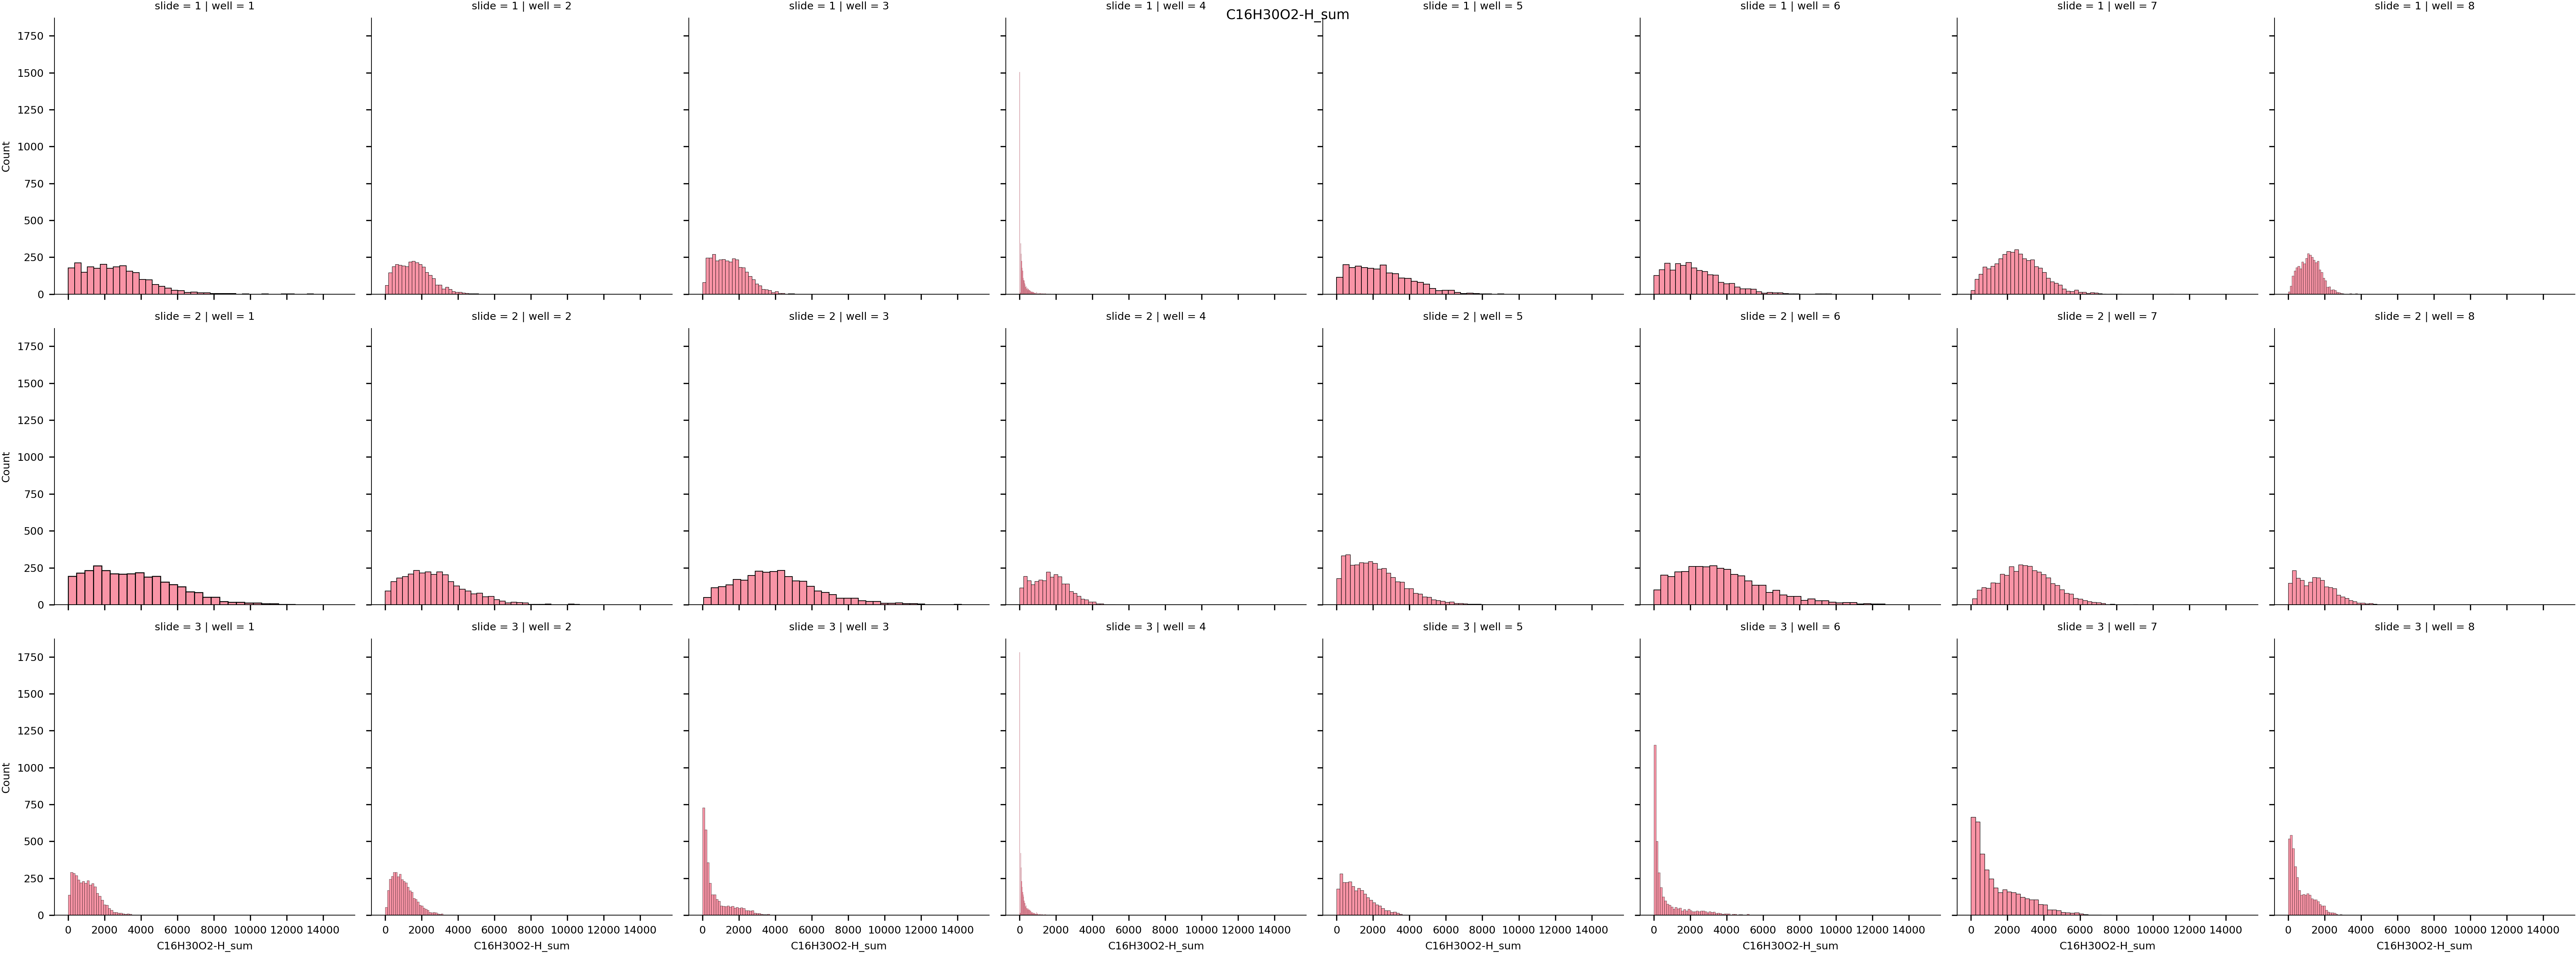

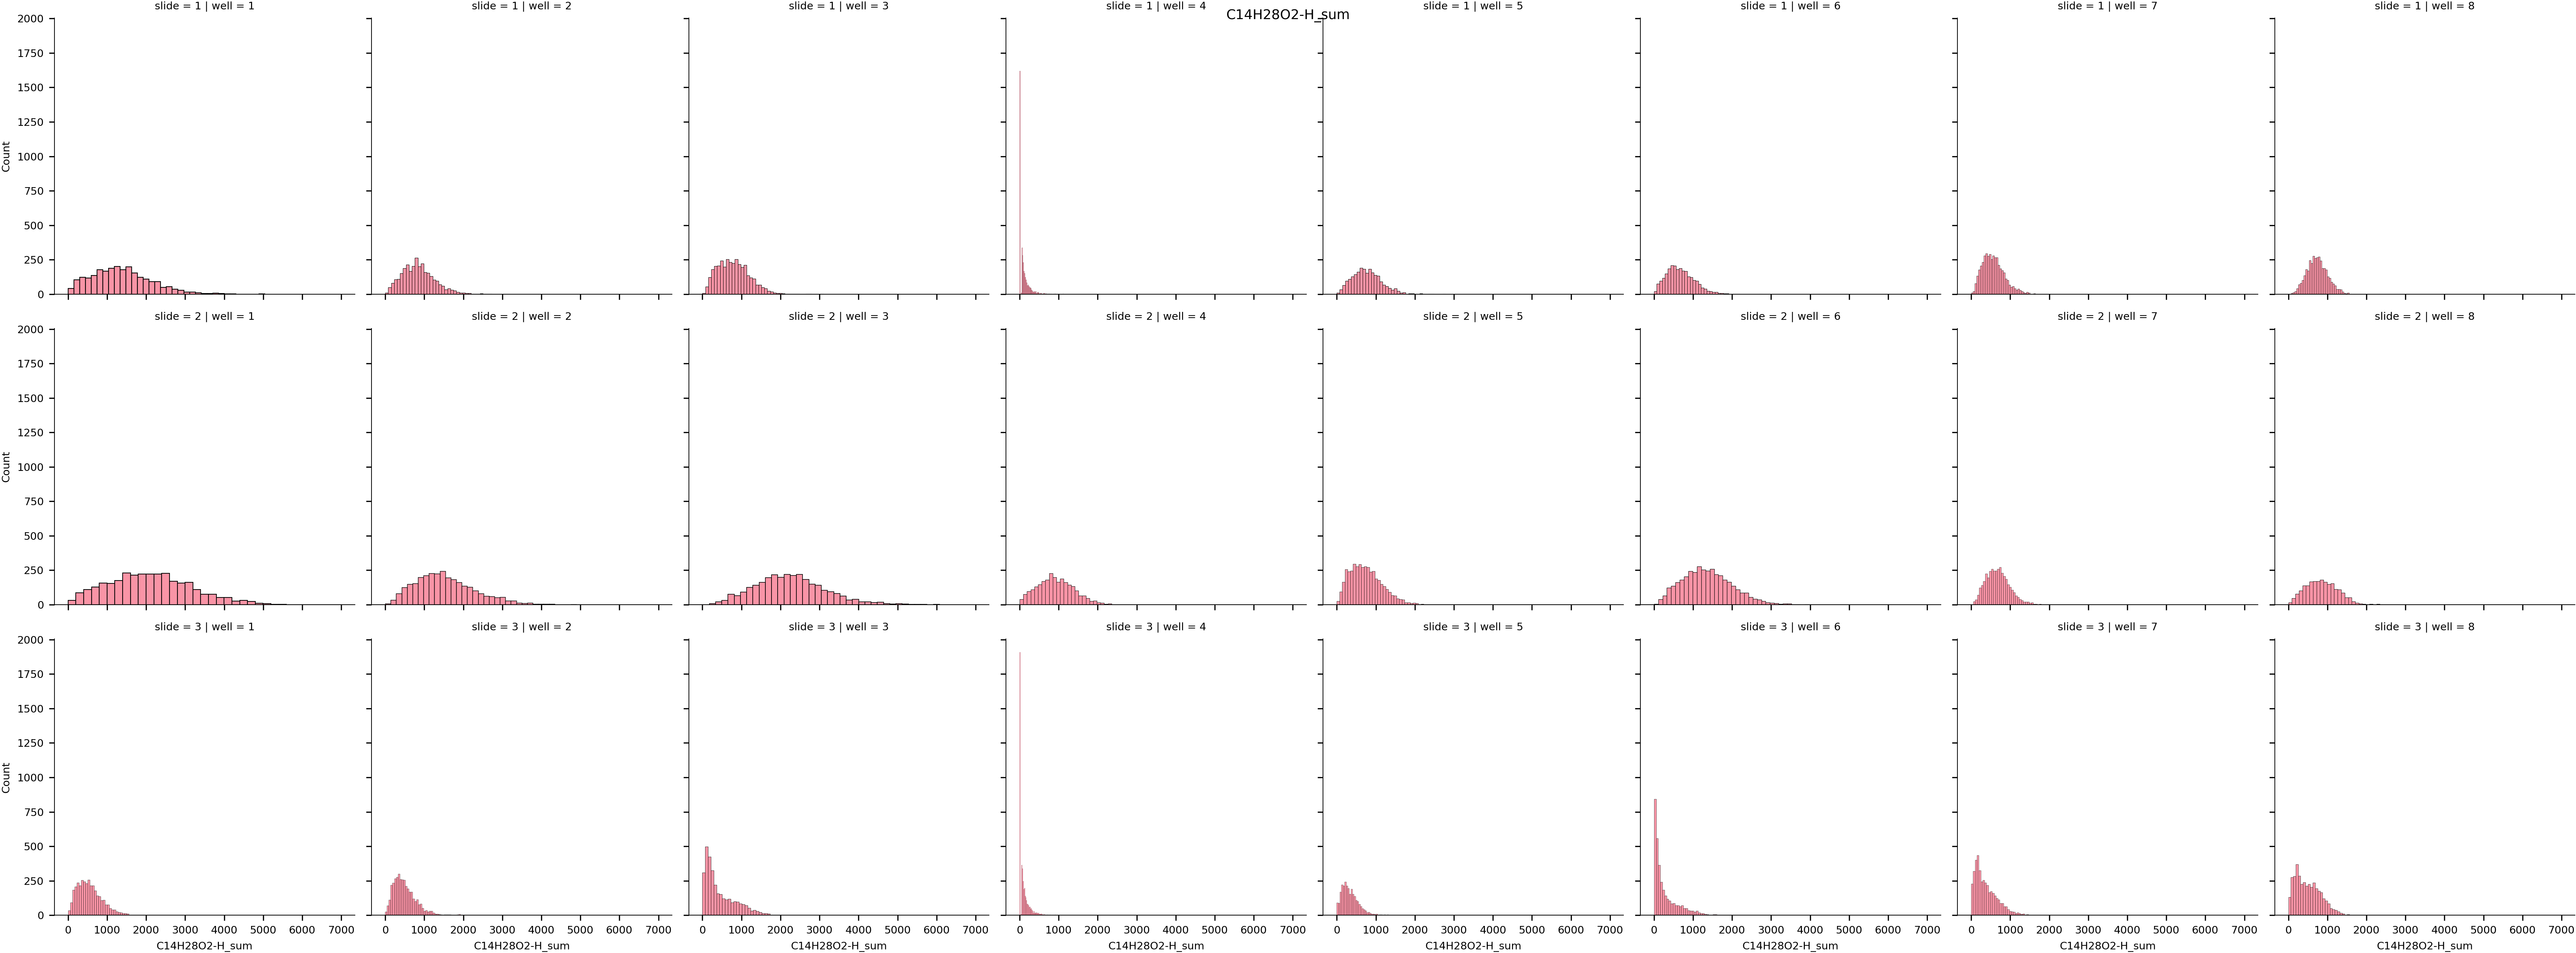

In [11]:
plot_sum_intensities(adata_am_intra, plots_path)

## Exclude wells

In [12]:
# exclude_wells = ["S3W6", "S3W7", "S3W3", "S2W1"]
exclude_wells = ["S2W1"]

In [13]:
adata_filtered = adata_filtered[~adata_filtered.obs.batch.isin(exclude_wells), :]

## Filter by cell size

In [14]:
adata

AnnData object with n_obs × n_vars = 7696 × 100
    obs: 'center_x', 'center_y', 'cell_area', 'cell_sampling_area', 'cell_sampling_ratio', 'cell_nearest_am_distance', 'cell_nearest_cell_distance', 'centroid-0', 'centroid-1', 'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3', 'local_centroid-0', 'local_centroid-1', 'area', 'filled_area', 'solidity', 'perimeter', 'eccentricity', 'euler_number', 'moments_hu-0', 'moments_hu-1', 'moments_hu-2', 'moments_hu-3', 'moments_hu-4', 'moments_hu-5', 'moments_hu-6', 'moments_central-0-0', 'moments_central-0-1', 'moments_central-0-2', 'moments_central-0-3', 'moments_central-1-0', 'moments_central-1-1', 'moments_central-1-2', 'moments_central-1-3', 'moments_central-2-0', 'moments_central-2-1', 'moments_central-2-2', 'moments_central-2-3', 'moments_central-3-0', 'moments_central-3-1', 'moments_central-3-2', 'moments_central-3-3', 'inertia_tensor_eigvals-0', 'inertia_tensor_eigvals-1', 'major_axis_length', 'minor_axis_length', 'weighted_moments_central-0-0-Dapi', 

/tmp/ipykernel_28460/3271407407.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_filtered.obs["log_cell_area"] = np.log10(adata_filtered.obs.cell_area)


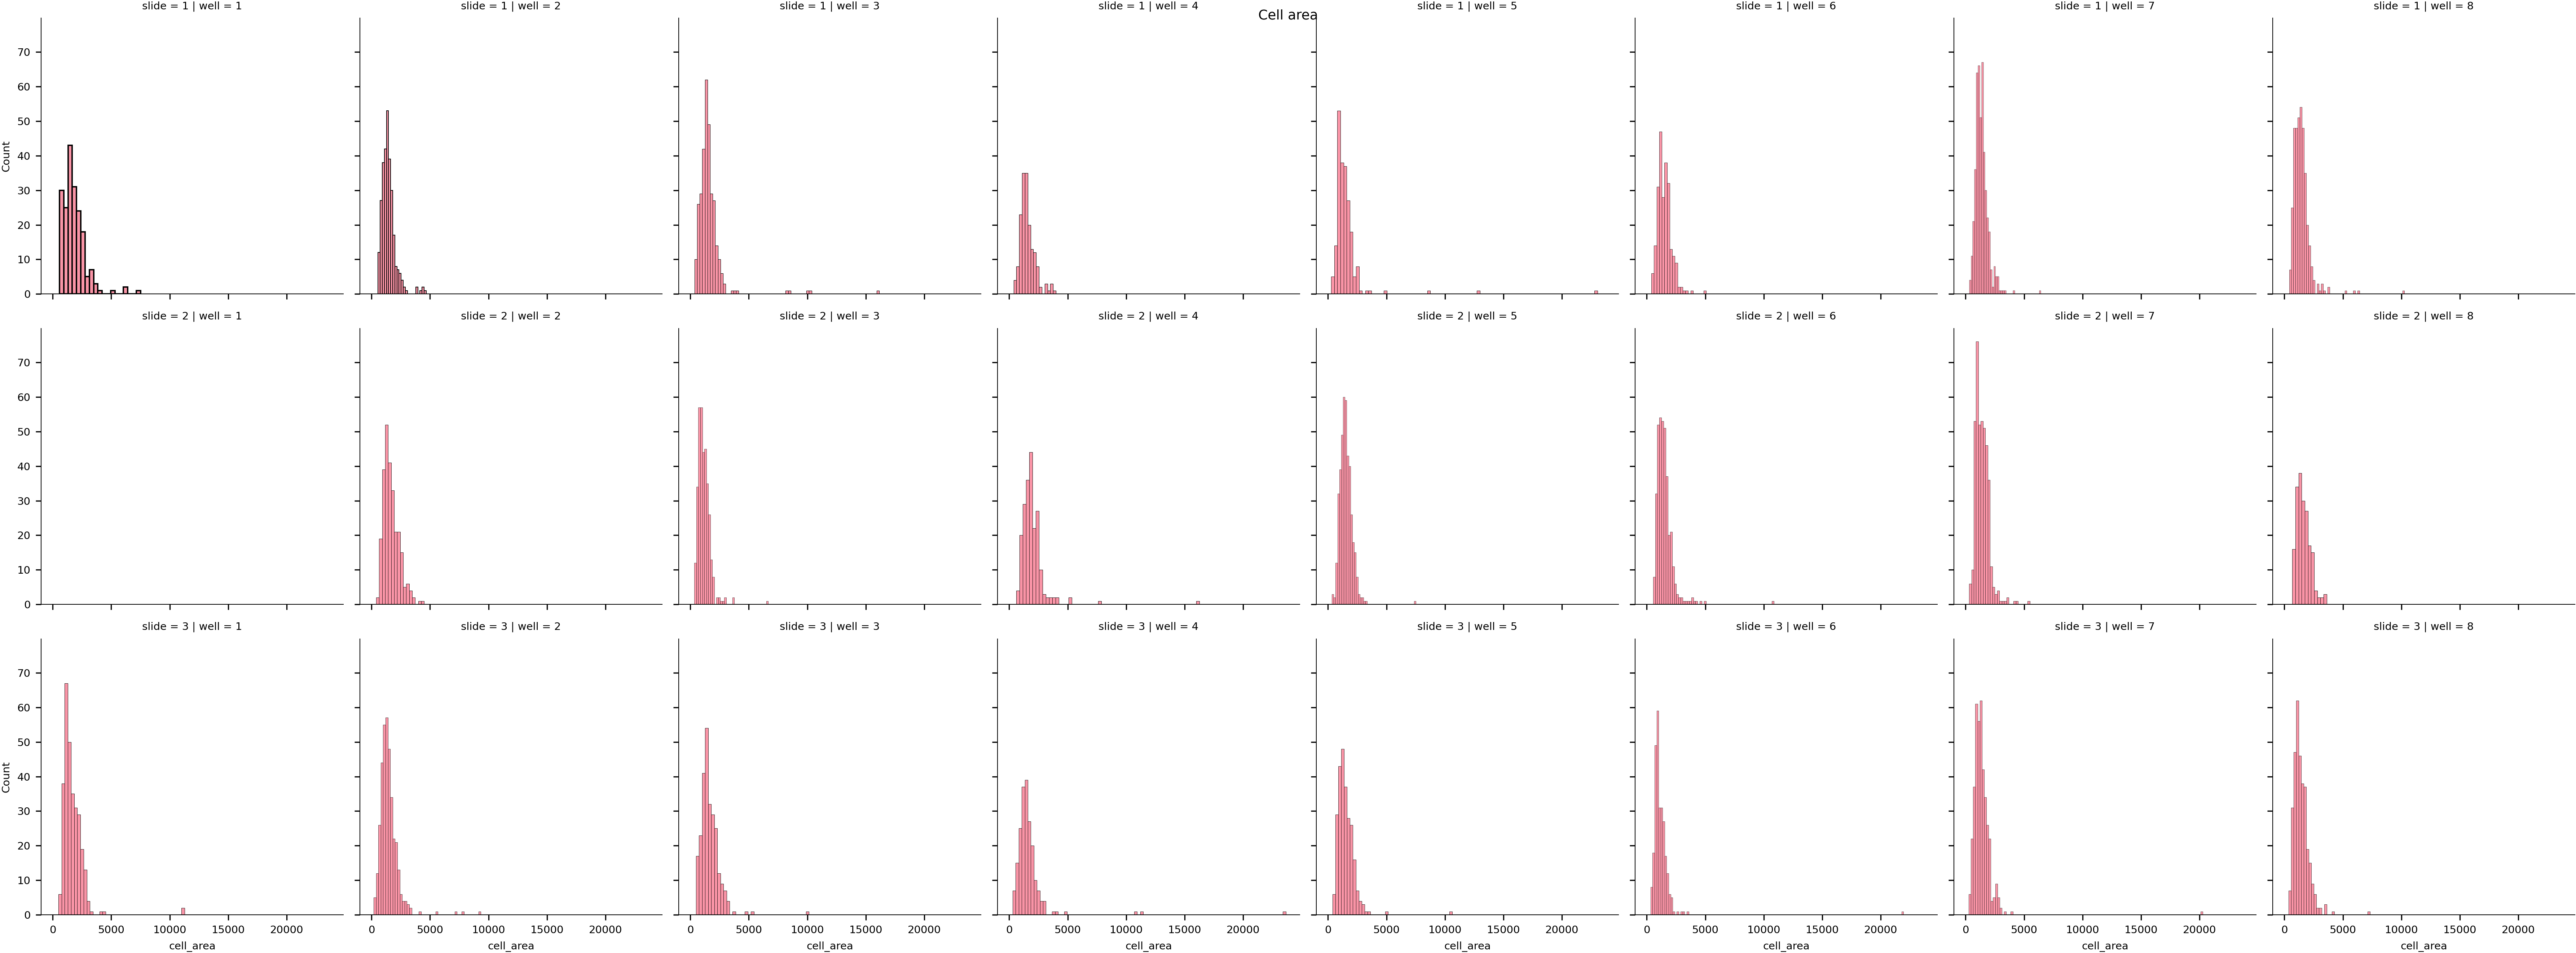

In [15]:
adata_filtered.obs["log_cell_area"] = np.log10(adata_filtered.obs.cell_area)
g = sns.FacetGrid(adata_filtered.obs, col="well",  row="slide")
g.map_dataframe(sns.histplot, x="cell_area")
g.fig.suptitle("Cell area")
plt.savefig(plots_path / f"hist_per_slide_cell_area.png")
plt.show()

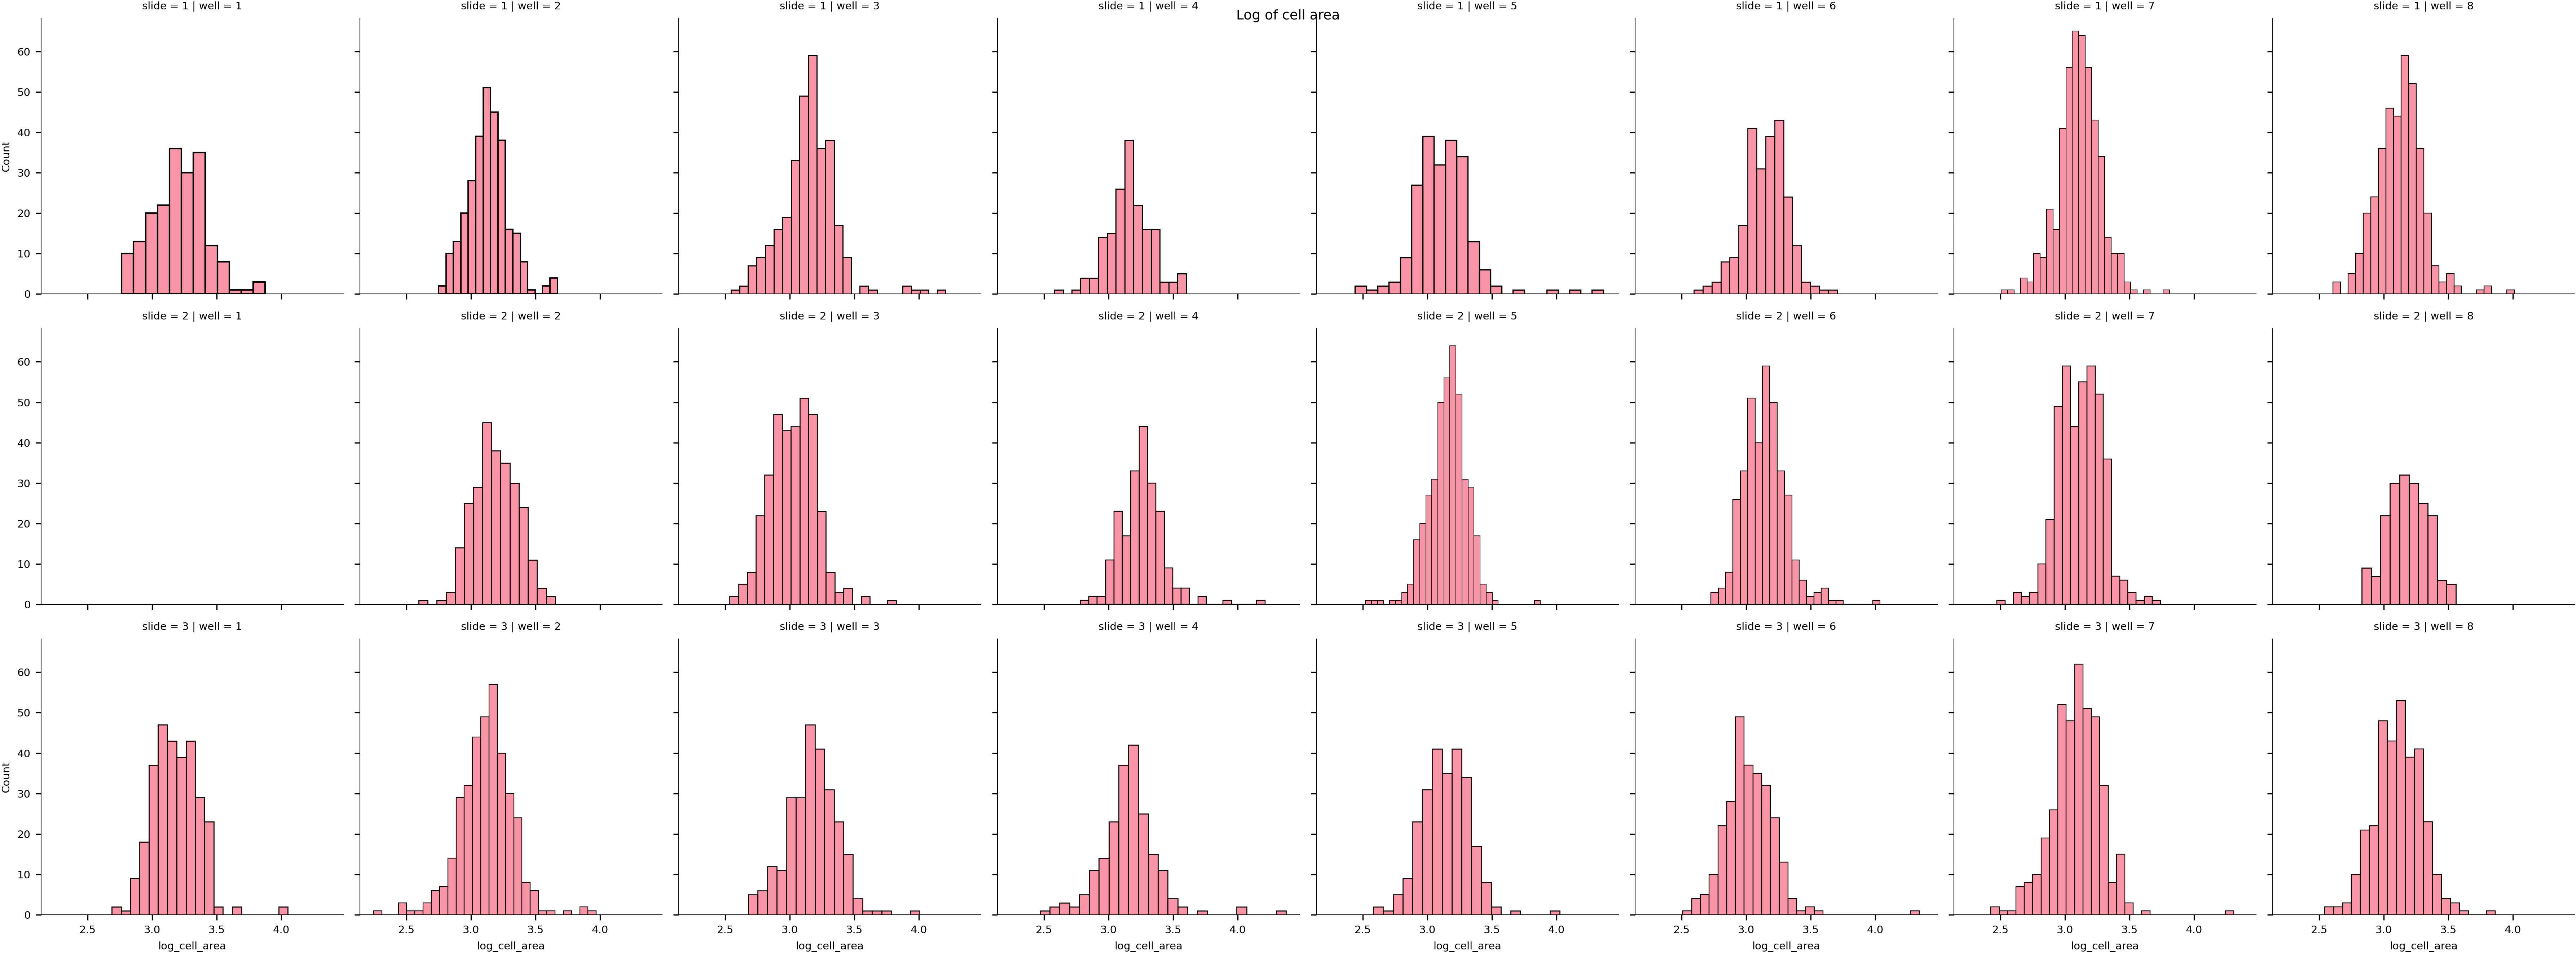

In [16]:
adata_filtered.obs["log_cell_area"] = np.log10(adata_filtered.obs.cell_area)
g = sns.FacetGrid(adata_filtered.obs, col="well",  row="slide")
g.map_dataframe(sns.histplot, x="log_cell_area")
g.fig.suptitle("Log of cell area")
plt.savefig(plots_path / f"hist_per_slide_log_cell_area.png")
plt.show()

In [17]:
cell_area_thrsh = 400

adata_filtered = adata_filtered[adata_filtered.obs.cell_area > cell_area_thrsh, :]

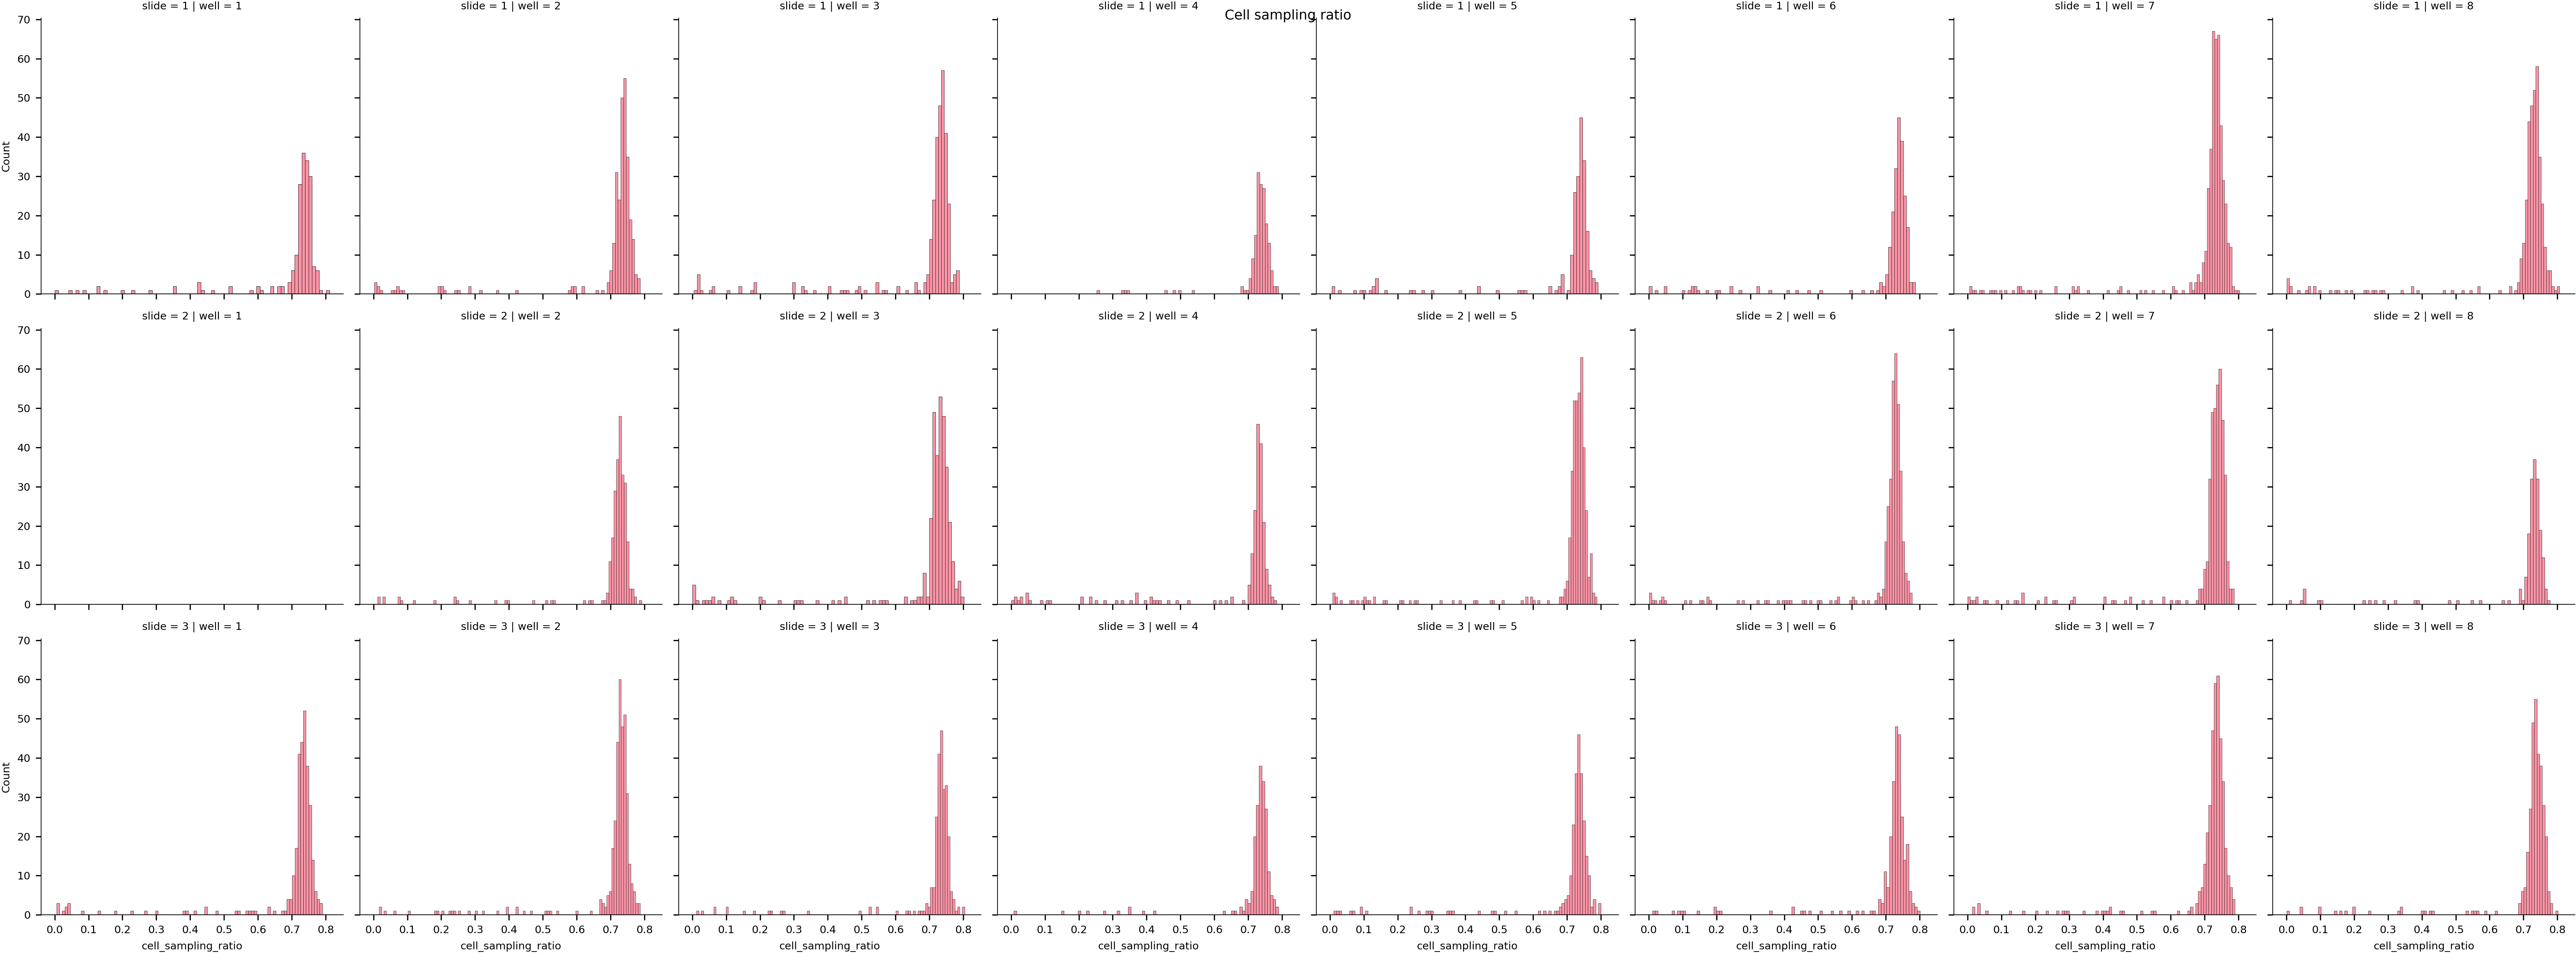

In [18]:
g = sns.FacetGrid(adata_filtered.obs, col="well",  row="slide")
g.map_dataframe(sns.histplot, x="cell_sampling_ratio")
g.fig.suptitle("Cell sampling ratio")
plt.savefig(plots_path / f"hist_per_slide_cell_sampling_ratio.png")
plt.show()

In [19]:
cell_sampling_ration_thrsh = 0.5

adata_filtered = adata_filtered[adata_filtered.obs.cell_sampling_ratio > cell_sampling_ration_thrsh, :]

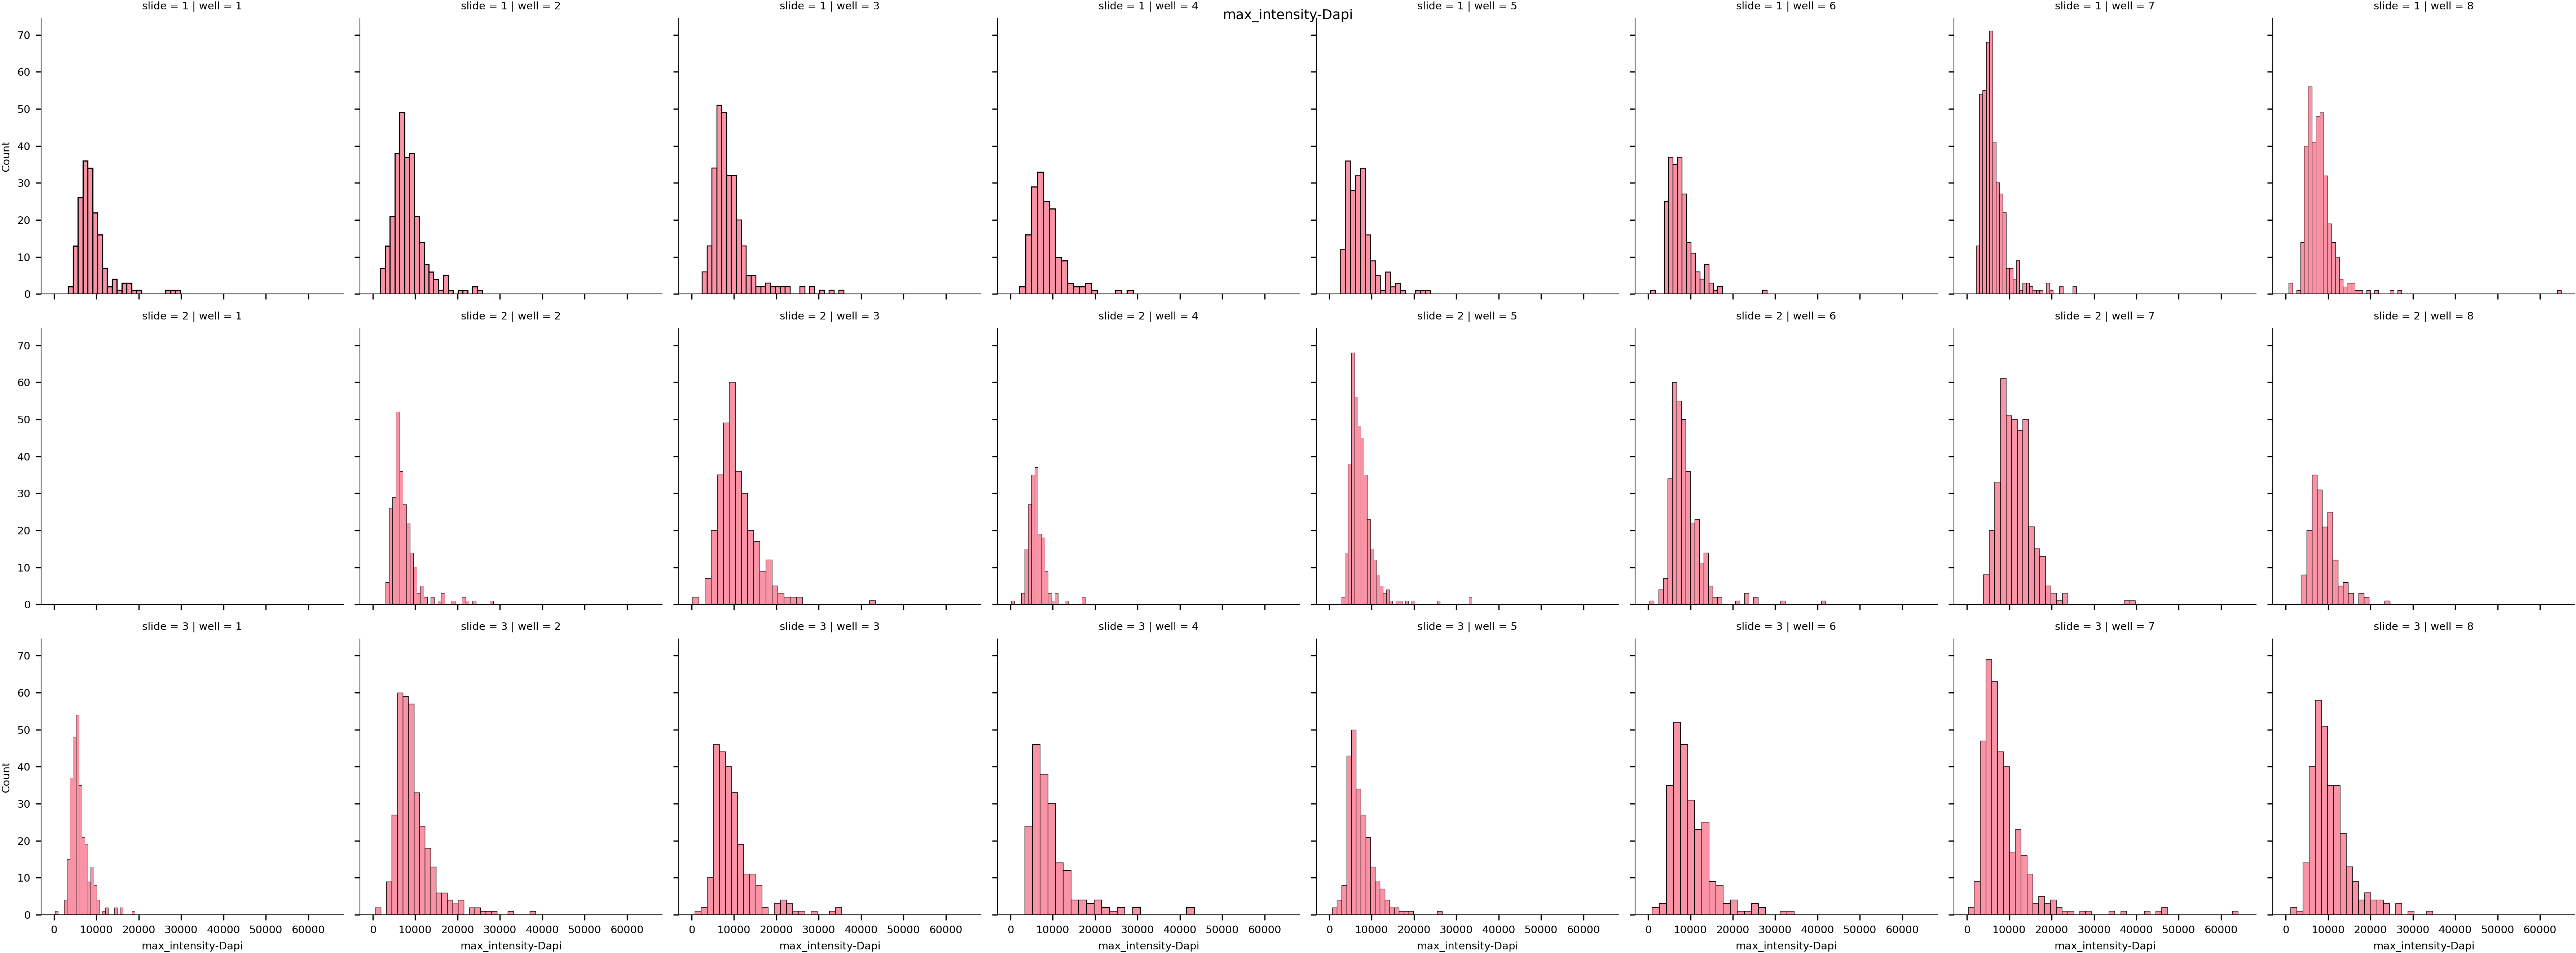

In [20]:
g = sns.FacetGrid(adata_filtered.obs, col="well",  row="slide")
g.map_dataframe(sns.histplot, x="max_intensity-Dapi")
g.fig.suptitle("max_intensity-Dapi")
plt.savefig(plots_path / f"hist_per_slide_max_dapi.png")
plt.show()

In [21]:
print_statistics(adata_filtered)

Number of cells per dataset
S1W1 174  cells
S1W2 268  cells
S1W3 282  cells
S1W4 160  cells
S1W5 188  cells
S1W6 212  cells
S1W7 428  cells
S1W8 346  cells
S2W2 244  cells
S2W3 312  cells
S2W4 174  cells
S2W5 384  cells
S2W6 334  cells
S2W7 383  cells
S2W8 172  cells
S3W1 276  cells
S3W2 334  cells
S3W3 243  cells
S3W4 188  cells
S3W5 230  cells
S3W6 250  cells
S3W7 369  cells
S3W8 306  cells
Number of cells per condition
ACLYkd Ol.2 + Wildtype 1296  cells
ACLYkd Ol.2 837  cells
Wildtype 1346  cells
ACLY Ol.1 + Wildtype 1598  cells
ACLY Ol.1 1180  cells
Pivot table with condition and labeling state
growthConditions   Labeled                                   \
condition        ACLY Ol.1 ACLY Ol.1 + Wildtype ACLYkd Ol.2   
batch                 1180                 1598         837   

growthConditions                                 Unlabeled  \
condition        ACLYkd Ol.2 + Wildtype Wildtype ACLY Ol.1   
batch                              1296      522         0   

growthConditions 

In [22]:
output_file = anndata_dir / "aclykd_adata_concat_filtered.h5ad"
adata_filtered.write(output_file.with_suffix(".h5ad"))